In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/api-clean-top-1000-youtubers-statistics/Clean_Top_1000_Youtube_df - youtubers_df.csv


In [22]:
yt_stats = pd.read_csv('/kaggle/input/api-clean-top-1000-youtubers-statistics/Clean_Top_1000_Youtube_df - youtubers_df.csv')

In [23]:
yt_stats.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,"249,500,000",IN,"86,200","2,700",78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,"183,500,000",US,"117,400,000","5,300,000","18,500",http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,"165,500,000",US,"7,000,000","24,700",0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,"162,600,000",IN,"15,600",166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,"113,500,000",US,"3,900,000","12,400",0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [24]:
yt_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        1000 non-null   int64 
 1   Username    1000 non-null   object
 2   Categories  1000 non-null   object
 3   Suscribers  1000 non-null   object
 4   Country     1000 non-null   object
 5   Visits      1000 non-null   object
 6   Likes       1000 non-null   object
 7   Comments    1000 non-null   object
 8   Links       1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


converting Subscribers, Visits, Likes and Comments to integers

In [25]:
yt_stats['Suscribers'] = yt_stats['Suscribers'].apply(lambda a: int(a.replace(',','')))

In [26]:
yt_stats['Visits'] = yt_stats['Visits'].apply(lambda a: int(a.replace(',','')))
yt_stats['Likes'] = yt_stats['Likes'].apply(lambda a: int(a.replace(',','')))
yt_stats['Comments'] = yt_stats['Comments'].apply(lambda a: int(a.replace(',','')))

In [27]:
yt_stats.info()
#checking changes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        1000 non-null   int64 
 1   Username    1000 non-null   object
 2   Categories  1000 non-null   object
 3   Suscribers  1000 non-null   int64 
 4   Country     1000 non-null   object
 5   Visits      1000 non-null   int64 
 6   Likes       1000 non-null   int64 
 7   Comments    1000 non-null   int64 
 8   Links       1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [28]:
yt_stats.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,249500000,IN,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,183500000,US,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,165500000,US,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,162600000,IN,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,113500000,US,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [29]:
yt_stats.rename({'Suscribers':'Subscribers'},axis=1,inplace=True)

In [30]:
#Segmenting by numerical columns
yt_stats_num = yt_stats.select_dtypes(exclude='object')

Checking missing values.

Text(0.5, 1.0, 'Missing Values')

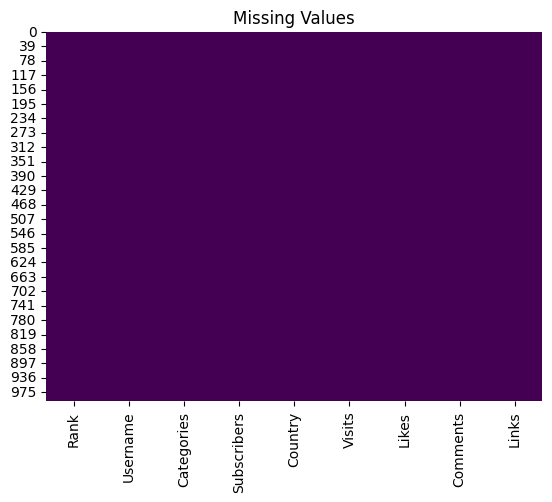

In [31]:
sns.heatmap(yt_stats.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Values')

There are no missing values.

Text(0.5, 1.0, 'Correlation')

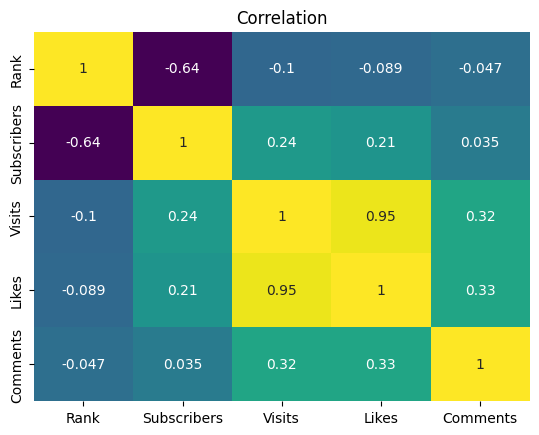

In [33]:
sns.heatmap(yt_stats_num.corr(),annot=True,cmap='viridis',cbar=False)
plt.title('Correlation')

Strong correlation between likes and visits.
Slightly strong correlation between Likes and comments.

In [34]:
yt_stats.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

Trying to determine the most successful countries.

In [43]:
yt_stats.groupby('Country')['Subscribers'].sum().sort_values(ascending=False)

Country
US    7302300000
IN    5678900000
BR    1396400000
MX     801800000
ID     683500000
GB     664600000
KR     646400000
ES     400600000
TH     373100000
RU     370300000
AR     333300000
CO     280400000
PH     244600000
JP     227200000
CA     219200000
PK     205200000
AE     201000000
SA     151500000
TR     144100000
AU     127000000
DE     123300000
PR     119700000
CL     111400000
NL      97400000
UA      94900000
SE      78600000
SV      68400000
JO      68300000
IE      67800000
BY      63700000
FR      58300000
EC      55600000
EG      55100000
FI      47100000
IT      46200000
CY      44600000
NO      44000000
KW      32700000
VN      32000000
SG      27500000
BD      26800000
LV      22400000
CH      19700000
MY      18000000
IQ      17600000
IL      15600000
PE      14400000
HK      13200000
SI      13000000
PT      12600000
QA      12600000
AT      12600000
DZ      12200000
Name: Subscribers, dtype: int64

USA, India and Brazil have the most subscriber count. USA and India have a significantly larger subscriber count compared with the rest.

In [46]:
yt_stats.groupby('Country')[['Visits','Likes','Comments']].sum().sort_values('Likes',ascending=False)

,Visits,Likes,Comments
Country,,,
US,585230860,23552410,475151
IN,234953856,11398843,220612
MX,49797400,2983728,54852
BR,29004300,1711436,182437
KR,26951900,1429879,25215
RU,24305100,1380664,34401
GB,29136600,1250115,81924
AR,18818000,1086560,11886
JP,16803800,1028724,11745


USA and India are top two countries after sorting with Subscribers, Likes, Visits,Comments.

In [47]:
yt_stats.Country.value_counts()

Country
US    321
IN    237
BR     72
MX     40
ID     35
GB     33
KR     25
ES     23
RU     20
TH     19
AR     14
CA     13
CO     13
PH     12
AE      9
PK      9
SA      9
JP      7
DE      7
TR      7
NL      6
AU      6
UA      6
SE      5
FR      4
PR      4
EG      4
FI      3
EC      3
JO      3
CL      3
SV      2
IT      2
IE      2
VN      2
BD      2
BY      2
QA      1
SI      1
IL      1
PT      1
HK      1
AT      1
PE      1
KW      1
IQ      1
MY      1
CH      1
LV      1
SG      1
NO      1
CY      1
DZ      1
Name: count, dtype: int64

USA and India have the most representations in the dataset.

In [52]:
country_count = yt_stats.Country.value_counts()

Text(0.5, 1.0, 'Country Distribution')

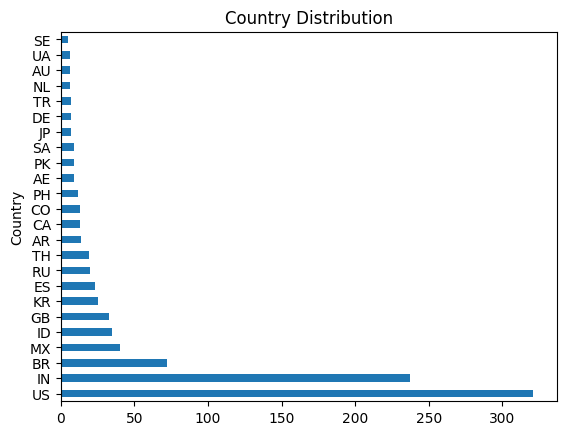

In [55]:
country_count[country_count>4].plot.barh()
plt.title('Country Distribution')

Checking accounts with the most subscribers and their countries.

In [65]:
yt_stats[yt_stats['Subscribers']==249500000]['Username']

0    tseries
Name: Username, dtype: object

In [71]:
yt_stats[['Username','Subscribers','Country']].sort_values(by='Subscribers',ascending=False).head(10)

,Username,Subscribers,Country
0,tseries,249500000,IN
1,MrBeast,183500000,US
2,CoComelon,165500000,US
3,SETIndia,162600000,IN
4,KidsDianaShow,113500000,US
5,PewDiePie,111500000,JP
6,LikeNastyaofficial,107500000,US
7,VladandNiki,101400000,US
8,zeemusiccompany,99700000,IN
9,WWE,97200000,US


Top ten accounts are dominated by USA and India. 

Text(0.5, 1.0, 'Categories')

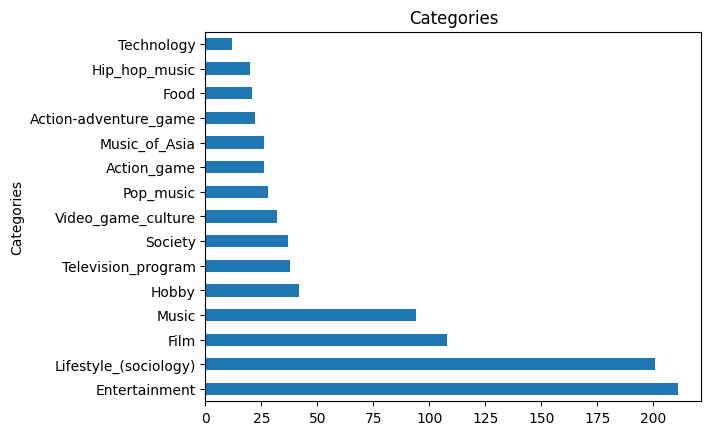

In [77]:
#Checking Categories
yt_stats.Categories.value_counts()[yt_stats.Categories.value_counts()>10].plot.barh()
plt.title('Categories')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Entertainment'),
  Text(0, 1, 'Music'),
  Text(0, 2, 'Hobby'),
  Text(0, 3, 'Action_game'),
  Text(0, 4, 'Lifestyle_(sociology)'),
  Text(0, 5, 'Music_of_Asia'),
  Text(0, 6, 'Film'),
  Text(0, 7, 'Pop_music'),
  Text(0, 8, 'Hip_hop_music'),
  Text(0, 9, 'Society'),
  Text(0, 10, 'Television_program'),
  Text(0, 11, 'Video_game_culture'),
  Text(0, 12, 'Music_of_Latin_America'),
  Text(0, 13, 'Tourism'),
  Text(0, 14, 'Electronic_music'),
  Text(0, 15, 'Knowledge'),
  Text(0, 16, 'Association_football'),
  Text(0, 17, 'Politics'),
  Text(0, 18, 'Role-playing_video_game'),
  Text(0, 19, 'Action-adventure_game'),
  Text(0, 20, 'Food'),
  Text(0, 21, 'Technology'),
  Text(0, 22, 'Religion'),
  Text(0, 23, 'Humour'),
  Text(0, 24, 'Performing_arts'),
  Te

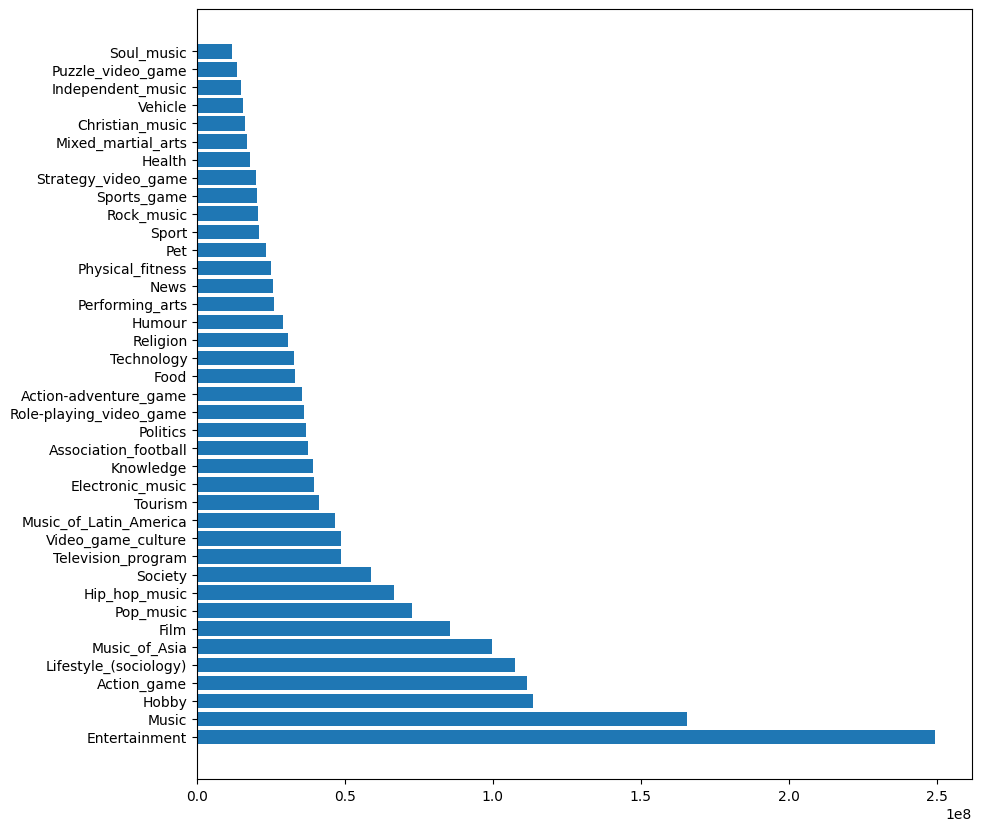

In [85]:
plt.figure(figsize=(10,10))
plt.barh(yt_stats['Categories'],yt_stats['Subscribers'])
plt.yticks(fontsize=10)

Entertainment and music(with several subcategories) categories have the most subscriber counts.

In [86]:
yt_stats.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [91]:
yt_stats.groupby('Country')['Visits'].sum().sort_values(ascending=False)

Country
US    585230860
IN    234953856
MX     49797400
GB     29136600
BR     29004300
KR     26951900
RU     24305100
AR     18818000
JP     16803800
CA     16623200
ID     15344700
CO     14781100
DE     13853800
NL     13073200
SV     12900000
BY     11500000
ES     11081100
AE     11065200
PH      8972600
UA      7602500
SE      6939300
AU      6532700
SA      5864900
PK      5700100
TR      4948200
TH      4788100
KW      3300000
FI      3299900
IT      2500000
CL      2156100
IE      1641700
EC      1591700
SG      1500000
AT      1400000
FR      1162000
LV       598300
JO       510100
VN       485300
BD       390900
DZ       333500
EG       313600
PR       257900
HK       176700
NO       124700
IL       124400
IQ       103600
MY        67500
SI        53000
PT        43700
CH        43200
CY        22700
PE         9300
QA         7000
Name: Visits, dtype: int64

### yt_stats.head(2)